# Les Algorithmes Classiques du Machine Learning

Bienvenue dans ce notebook dédié aux algorithmes classiques du Machine Learning. L'objectif est de comprendre le pourquoi et le comment de chaque algorithme, avec des explications détaillées et des implémentations en Python.


## 1. Régression Linéaire


### Introduction
La régression linéaire est l'un des algorithmes les plus simples et les plus utilisés en apprentissage supervisé pour les tâches de prédiction de valeurs continues. Elle établit une relation linéaire entre une variable dépendante (cible) et une ou plusieurs variables indépendantes (caractéristiques).

### Pourquoi l'utiliser ?
- Simplicité : Facile à interpréter et à expliquer.
- Rapidité : Rapide à entraîner, même sur de grands jeux de données.
- Base pour d'autres algorithmes : Sert de fondation pour des modèles plus complexes.

### Comment ça marche ?
La régression linéaire cherche à ajuster une ligne (ou un hyperplan en dimensions supérieures) qui minimise la somme des carrés des distances (erreurs) entre les points de données réels et les prédictions du modèle.

### Implémentation en Python
Nous allons utiliser le jeu de données Diabetes de scikit-learn pour prédire la progression de la maladie un an plus tard en fonction de certaines caractéristiques.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour ignorer les avertissements inutiles
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Générer des données de régression linéaire avec bruit
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Conversion en DataFrame pour une meilleure manipulation
data = pd.DataFrame({'Feature': X.flatten(), 'Target': y})

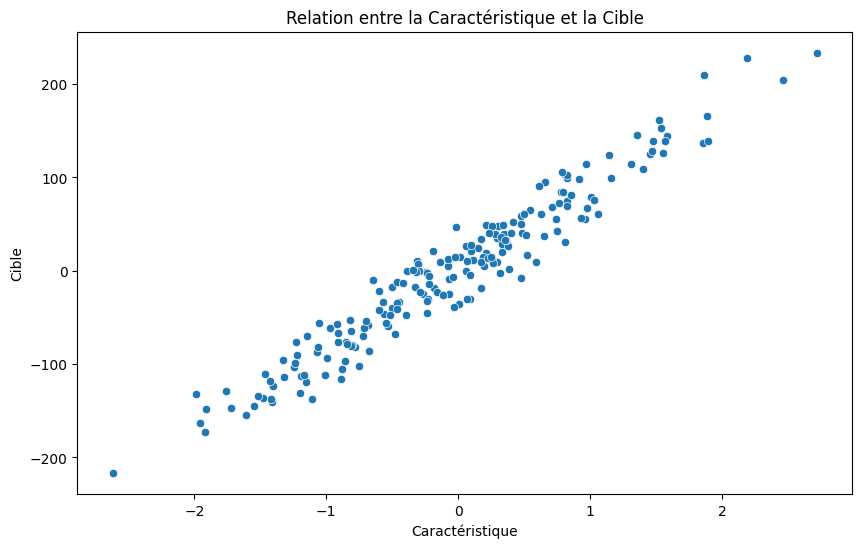

In [ ]:
# Visualisation de la relation entre la caractéristique et la cible
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Feature', y='Target')
plt.title('Relation entre la Caractéristique et la Cible')
plt.xlabel('Caractéristique')
plt.ylabel('Cible')
plt.show()

In [ ]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)

In [ ]:
# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Affichage des coefficients
# Y = β0 + X * β1
print("Coefficient (β1) :", model.coef_[0])
print("Ordonnée à l'origine (β0) :", model.intercept_)

Coefficient (β1) : 86.5115419768739
Ordonnée à l'origine (β0) : 2.4461021846792352


In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

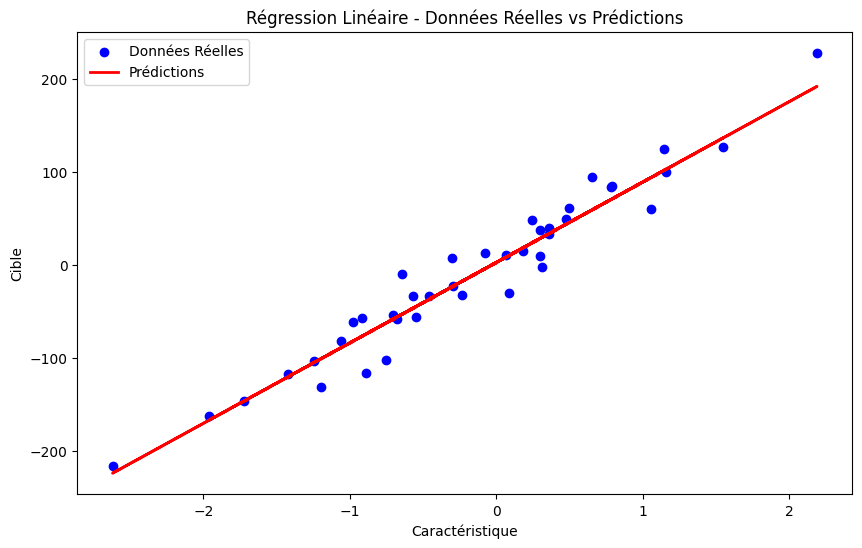

In [ ]:
# Visualisation des Résultats
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Données Réelles')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prédictions')
plt.title('Régression Linéaire - Données Réelles vs Prédictions')
plt.xlabel('Caractéristique')
plt.ylabel('Cible')
plt.legend()
plt.show()

In [ ]:
print('Erreur Absolue Moyenne (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Erreur Quadratique Moyenne (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Racine de l\'Erreur Quadratique Moyenne (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Erreur Absolue Moyenne (MAE): 16.040541887491848
Erreur Quadratique Moyenne (MSE): 437.54985402070196
Racine de l'Erreur Quadratique Moyenne (RMSE): 20.917692368440214


La régression linéaire est un outil puissant pour modéliser les relations linéaires entre les variables. En analysant les résidus et en vérifiant les hypothèses, nous pouvons évaluer la fiabilité du modèle. Dans cet exemple, le modèle semble bien ajusté aux données, comme le montrent les métriques de performance et les graphiques.


## 2. Régression Logistique


### Introduction

La régression logistique est un algorithme d'apprentissage supervisé utilisé pour les tâches de classification binaire (et multiclasse avec certaines extensions). Elle modélise la probabilité qu'une instance appartienne à une classe particulière.

### Pourquoi l'utiliser ?

- Interprétabilité : Les coefficients peuvent être interprétés comme l'effet des variables indépendantes sur la probabilité.
- Efficacité : Fonctionne bien sur des données linéairement séparables.
- Probabilités : Fournit des probabilités pour les prédictions, ce qui est utile pour la prise de décision.

### Implémentation en Python
Nous allons utiliser le jeu de données Breast Cancer de scikit-learn pour prédire si une tumeur est maligne ou bénigne.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# Chargement du jeu de données
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [ ]:
# Création d'un DataFrame pour une meilleure visualisation
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

# Afficher des lignes
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
33,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,30.90,161.40,1813.0,0.1509,0.6590,0.6091,0.17850,0.3672,0.11230,0
145,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,0.07839,...,16.51,86.26,509.6,0.1424,0.2517,0.0942,0.06042,0.2727,0.10360,1
355,12.56,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,...,22.43,89.02,547.4,0.1096,0.2002,0.2388,0.09265,0.2121,0.07188,1
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,1
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.29100,0.4055,0.09789,0


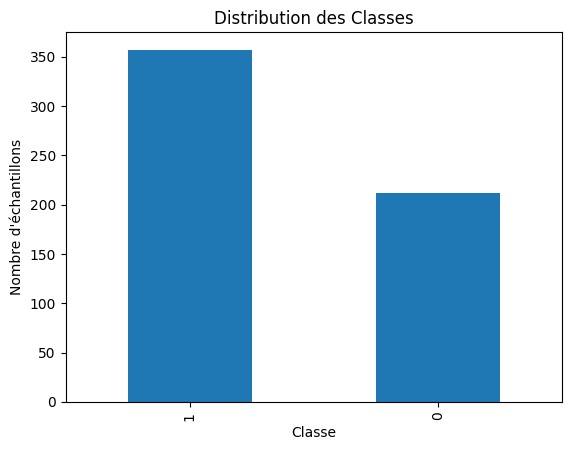

In [ ]:
# Vérifier la distribution des classes
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution des Classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

In [ ]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Création du modèle
model = LogisticRegression(max_iter=10000)

# Entraînement du modèle
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [ ]:
# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion:\n", cm)

# Rapport de classification
cr = classification_report(y_test, y_pred)
print("Rapport de Classification:\n", cr)

Précision : 0.956140350877193
Matrice de Confusion:
 [[39  4]
 [ 1 70]]
Rapport de Classification:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



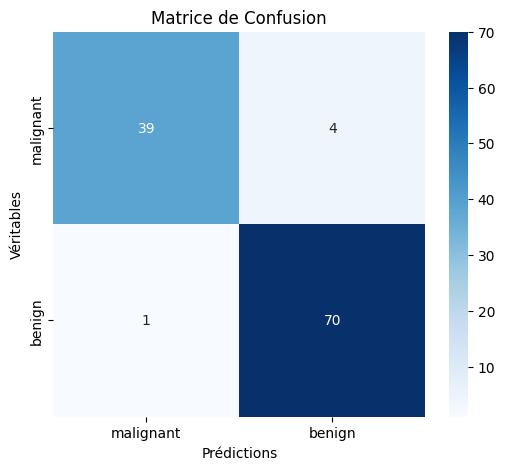

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.title('Matrice de Confusion')
plt.show()

La régression logistique est un algorithme simple mais puissant pour les tâches de classification binaire. Il fournit non seulement des prédictions, mais aussi des probabilités associées, ce qui est utile pour la prise de décision.

## 3. Arbres de Décision

### Introduction
Les arbres de décision sont des modèles non paramétriques utilisés pour les tâches de classification et de régression. Ils apprennent des règles de décision simples inférées des données pour prédire la valeur d'une cible.

### Pourquoi l'utiliser ?
- Interprétable : Facile à visualiser et à comprendre.
- Peut capturer des relations non linéaires.
- Peu de préparation des données nécessaire : Pas besoin de normaliser ou de mettre à l'échelle les données.

### Comment ça marche ?
L'algorithme partitionne récursivement les données en sous-ensembles basés sur les caractéristiques qui fournissent la meilleure séparation selon une mesure. À chaque nœud, l'algorithme choisit la caractéristique qui divise le mieux les données.

### Implémentation en Python
Nous allons utiliser le jeu de données Iris pour classer les espèces de fleurs.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
# Chargement du jeu de données
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Création du modèle
model = DecisionTreeClassifier()

# Entraînement du modèle
model.fit(X_train, y_train)

DecisionTreeClassifier()

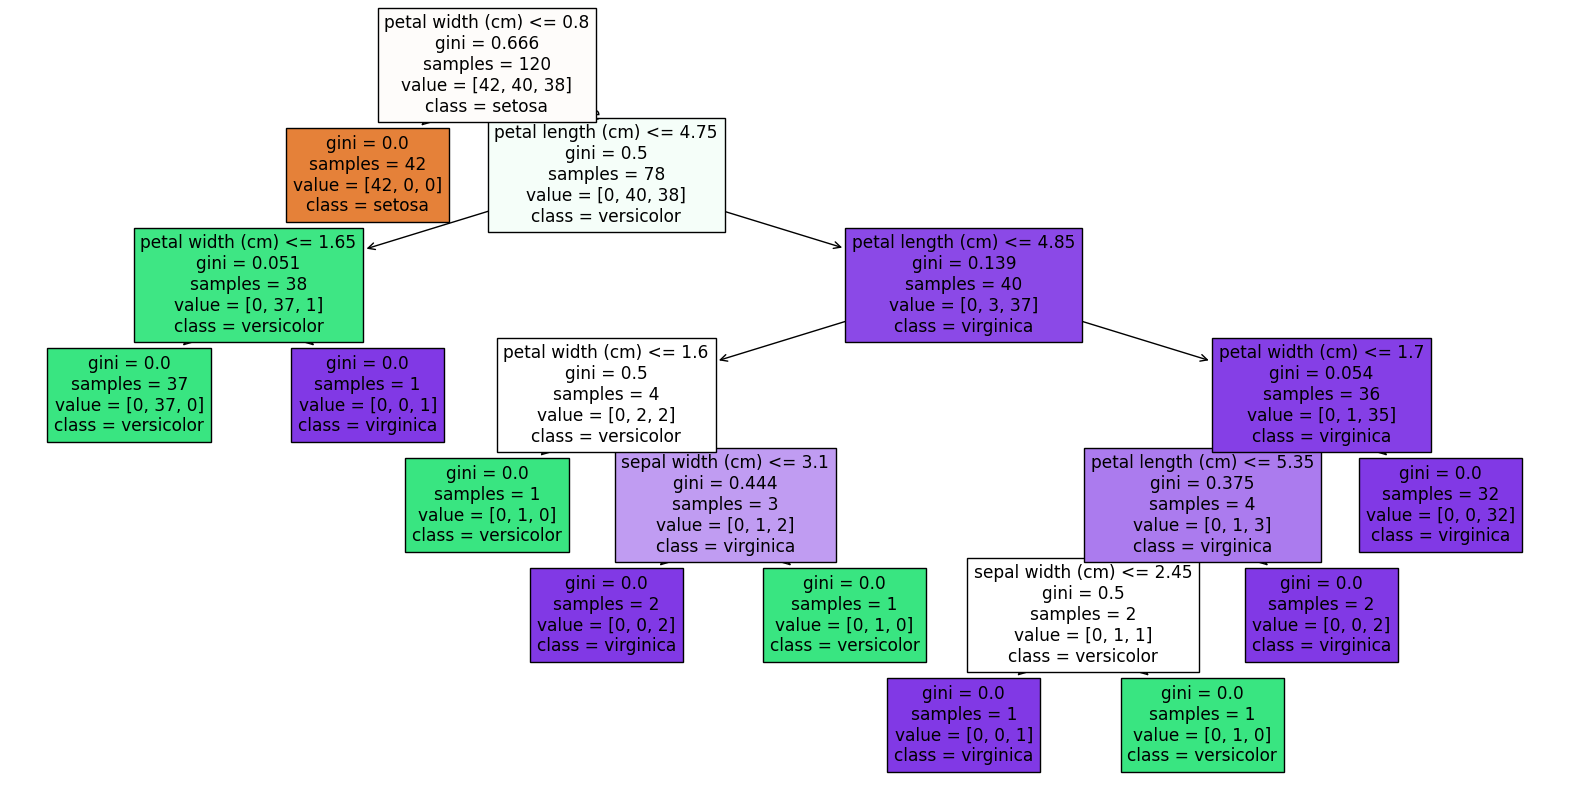

In [ ]:
# Visualisation de l'Arbre
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
# Evaluation
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

Précision : 0.9333333333333333


#### Interprétation
- Précision : Indique la proportion de prédictions correctes.
- Visualisation de l'Arbre : Permet de comprendre les règles de décision utilisées par le modèle.

#### Conclusion
Les arbres de décision sont des modèles faciles à interpréter et puissants pour capturer des relations complexes dans les données. Cependant, ils peuvent être sujets au surapprentissage si la profondeur de l'arbre n'est pas contrôlée.

## 4. Forêts Aléatoires

### Introduction
Les forêts aléatoires sont un ensemble d'arbres de décision (méthode d'ensemble) où chaque arbre est construit à partir d'un échantillon aléatoire du jeu de données. Elles utilisent la moyenne ou la majorité pour améliorer la précision prédictive et contrôler le surapprentissage.

### Pourquoi l'utiliser ?
- Puissant et précis : Donne de bonnes performances sur de nombreux problèmes.
- Réduit le surapprentissage : En moyenne, les résultats de plusieurs arbres réduisent la variance.
- Gère les données manquantes et les variables catégorielles.

### Comment ça marche ?
Chaque arbre de la forêt est construit à partir d'un échantillon bootstrap du jeu de données. De plus, lors de la construction de chaque nœud, un sous-ensemble aléatoire des caractéristiques est utilisé pour déterminer la meilleure séparation.

### Implémentation en Python
Nous allons utiliser le même jeu de données Iris.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Création du modèle
model = RandomForestClassifier(n_estimators=100)

# Entraînement du modèle
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

Précision : 0.9333333333333333


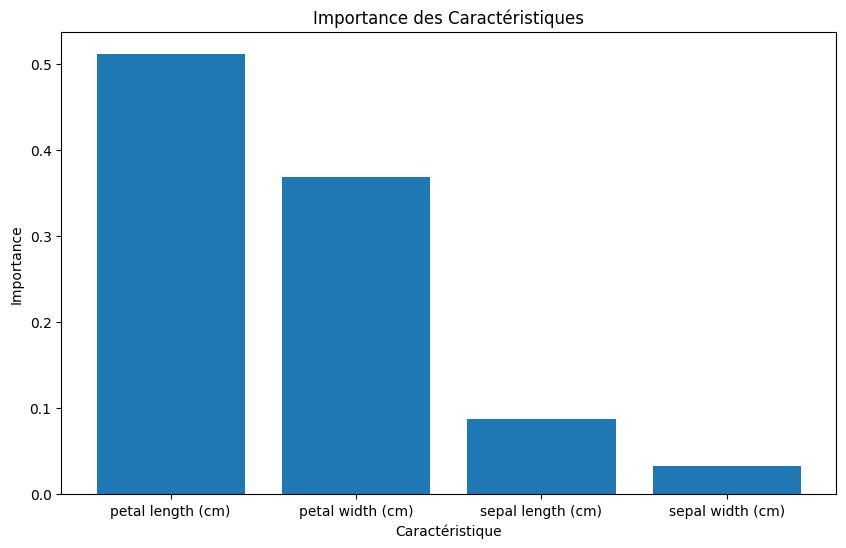

In [ ]:
# Importance des caractéristiques
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Affichage
plt.figure(figsize=(10,6))
plt.title("Importance des Caractéristiques")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices])
plt.xlabel('Caractéristique')
plt.ylabel('Importance')
plt.show()

#### Interprétation
- Précision : Souvent meilleure que celle d'un seul arbre de décision.
- Importance des Caractéristiques : Indique quelles caractéristiques sont les plus importantes pour la prédiction.

#### Conclusion
Les forêts aléatoires améliorent la performance des arbres de décision en réduisant le surapprentissage et en augmentant la généralisation du modèle.

## 5. Machines à Vecteurs de Support (SVM)

### Introduction
Les SVM sont des modèles supervisés utilisés pour la classification et la régression. Ils cherchent à trouver l'hyperplan qui maximise la marge entre les différentes classes.

### Pourquoi l'utiliser ?
- Efficace en haute dimension.
- Utilise des fonctions noyau : Peut gérer des données non linéaires.
- Robuste au surapprentissage : Surtout dans des espaces de grande dimension.

### Comment ça marche ?
Les SVM trouvent l'hyperplan qui sépare les classes avec la plus grande marge possible. Les points de données les plus proches de l'hyperplan sont appelés vecteurs de support. Les fonctions noyau permettent de transformer les données en un espace de dimension supérieure pour rendre les données linéairement séparables.

### Implémentation en Python
Nous allons utiliser le jeu de données Iris pour la classification.

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Création du modèle
model = SVC(kernel='linear')

# Entraînement du modèle
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

Précision : 1.0


**Visualisation (pour 2 caractéristiques)**

Pour visualiser les résultats, nous devons réduire les données à 2 caractéristiques.

In [ ]:
# Sélection de deux caractéristiques
X_reduced = iris.data[:, :2]  # Longueur et largeur des sépales
y = iris.target

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2)

# Entraînement du modèle
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

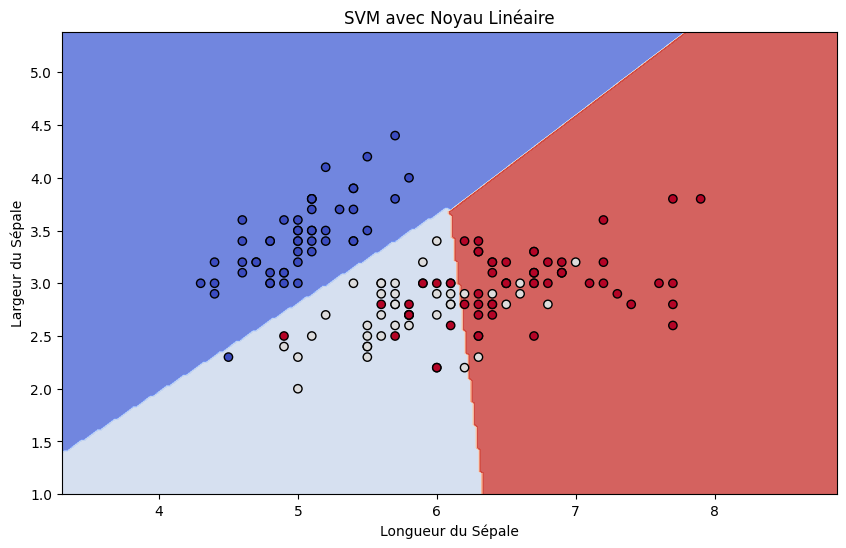

In [ ]:
# Création d'une grille pour la visualisation
h = .02  # taille de l'étape dans la grille
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédictions sur la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Longueur du Sépale')
plt.ylabel('Largeur du Sépale')
plt.title('SVM avec Noyau Linéaire')
plt.show()

#### Conclusion
Les SVM sont des algorithmes puissants pour la classification, en particulier dans des espaces de grande dimension. Les fonctions noyau permettent de gérer des données non linéaires.

## 6. K-Plus Proches Voisins (KNN)


### Introduction
Le KNN est un algorithme non paramétrique utilisé pour la classification et la régression. Il classe les instances en fonction des classes des K voisins les plus proches dans l'espace des caractéristiques.

### Pourquoi l'utiliser ?
- Simplicité : Facile à comprendre et à implémenter.
- Pas de phase d'entraînement : Les données sont utilisées directement pour la prédiction.
- Flexible : Peut capturer des relations complexes.

### Comment ça marche ?
Pour une nouvelle instance, l'algorithme trouve les K instances du jeu de données les plus proches (selon une métrique de distance, généralement la distance euclidienne) et effectue la prédiction en fonction des labels de ces voisins (par majorité pour la classification ou moyenne pour la régression).

### Implémentation en Python
Nous allons utiliser le jeu de données Iris.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Création du modèle
model = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle
model.fit(X_train, y_train)

KNeighborsClassifier()

#### **Clarification sur le KNN et la Phase d'Entraînement**

Dans l'algorithme KNN, il est souvent dit qu'il n'y a pas de véritable phase d'entraînement parce que le modèle ne construit pas de représentation abstraite ou n'apprend pas de paramètres à partir des données d'entraînement comme le font d'autres algorithmes (par exemple, les coefficients en régression linéaire).

Cependant, le KNN nécessite de stocker les données d'entraînement pour pouvoir calculer les distances entre les nouvelles instances et les instances d'entraînement lors de la phase de prédiction. Dans scikit-learn, la méthode fit() est utilisée pour stocker ces données.

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

Précision : 0.7666666666666667


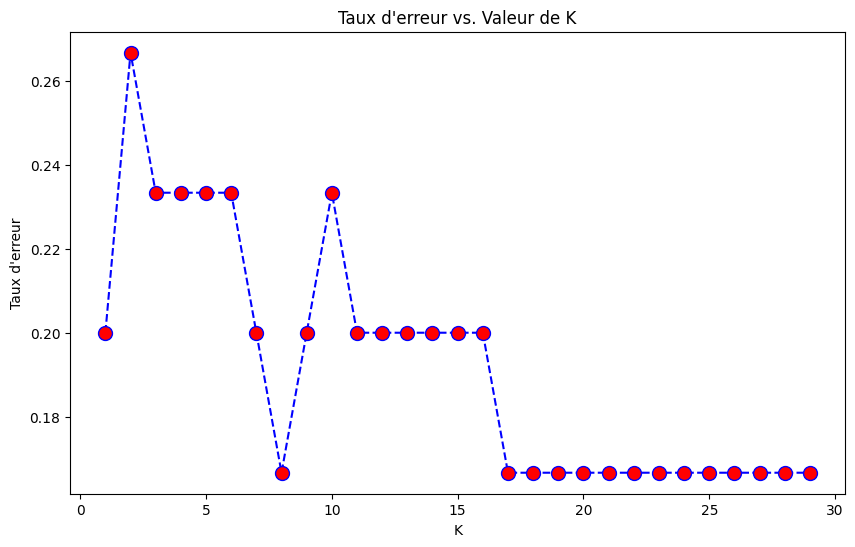

In [ ]:
# Tester différents valeurs de K
error_rate = []

# Boucle sur différentes valeurs de K
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Visualisation de l'erreur en fonction de K
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taux d\'erreur vs. Valeur de K')
plt.xlabel('K')
plt.ylabel('Taux d\'erreur')
plt.show()

#### Interprétation
- Précision : Dépend fortement du choix de K.
- Choix de K : Un K trop petit peut entraîner un surapprentissage, tandis qu'un K trop grand peut sous-apprendre.

#### Conclusion
Le KNN est un algorithme simple et efficace, mais il est important de choisir la bonne valeur de K et de prendre en compte que le temps de calcul peut être important pour de grands jeux de données.

## 7. Boosting

### Introduction
Le boosting est une méthode d'ensemble qui combine plusieurs modèles faibles pour créer un modèle fort. L'algorithme le plus connu est AdaBoost (Adaptive Boosting).

### Pourquoi l'utiliser ?
- Améliore les performances : En combinant des modèles faibles, on obtient de meilleures prédictions.
- Réduction du biais : Le boosting se concentre sur les erreurs des modèles précédents.
- Flexible : Peut être utilisé avec différents types de modèles faibles.

### Comment ça marche ?
Le boosting entraîne les modèles séquentiellement, chaque modèle tentant de corriger les erreurs des modèles précédents. Les observations mal prédites sont pondérées plus fortement dans les modèles suivants.

### Implémentation en Python
Nous allons utiliser AdaBoost avec des arbres de décision faibles.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour ignorer les avertissements inutiles
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# Générer des données de classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Conversion en DataFrame pour une meilleure manipulation
data = pd.DataFrame(X)
data['target'] = y

In [ ]:
# Afficher les premières lignes du jeu de données
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-4.906442,3.442789,0.558964,-0.976764,-1.568805,-4.271982,-3.727921,0.111868,2.119795,-2.522812,...,-7.492478,4.264669,0.304866,0.777693,-9.375464,1.654446,3.012859,-4.497003,-2.520066,0
1,2.162610,-5.286651,2.609846,-1.803898,-1.831216,1.450757,2.648709,2.152307,0.524552,0.493548,...,6.680603,-2.431830,2.462773,-1.254824,2.978402,-3.428457,-4.562178,3.698665,-1.923286,1
2,-4.784844,-3.744827,4.657592,-1.408806,-5.444758,-2.416013,3.556495,-1.572119,-0.730549,3.447661,...,7.961059,-5.151105,0.473131,-4.070667,-0.932309,-3.230768,-7.844646,2.803798,-2.963189,1
3,10.465024,1.070944,-3.562432,-0.849062,2.183860,-0.609893,0.946327,-1.046141,-2.057053,-2.056650,...,-1.449095,-1.217685,2.026805,2.121829,3.184256,-1.960146,0.782147,-1.444202,0.915985,0
4,5.599516,-1.776412,-1.304322,-0.720074,5.859373,-3.292432,3.152205,7.099882,-3.321076,3.245486,...,6.608729,5.632297,-1.943748,1.169455,3.782513,-4.752822,-7.577624,4.868025,1.708210,0


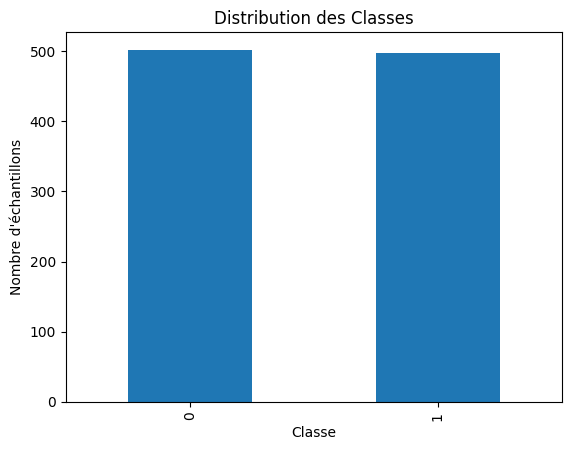

In [ ]:
# Vérifier la distribution des classes
data['target'].value_counts().plot(kind='bar')
plt.title('Distribution des Classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

In [ ]:
# Séparer les caractéristiques et la cible
X = data.drop('target', axis=1)
y = data['target']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Création du modèle AdaBoost avec le paramètre correct 'estimator'
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                         n_estimators=50, learning_rate=1.0, random_state=42)

# Entraînement du modèle
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = ada.predict(X_test)

In [ ]:
# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion:\n", cm)

# Rapport de classification
cr = classification_report(y_test, y_pred)
print("Rapport de Classification:\n", cr)

Précision : 0.83
Matrice de Confusion:
 [[85 21]
 [13 81]]
Rapport de Classification:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       106
           1       0.79      0.86      0.83        94

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



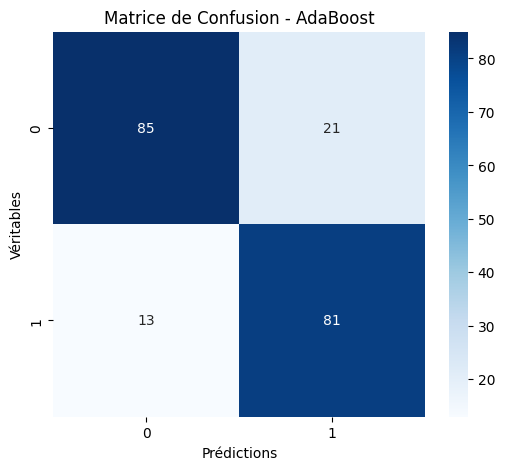

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.title('Matrice de Confusion - AdaBoost')
plt.show()

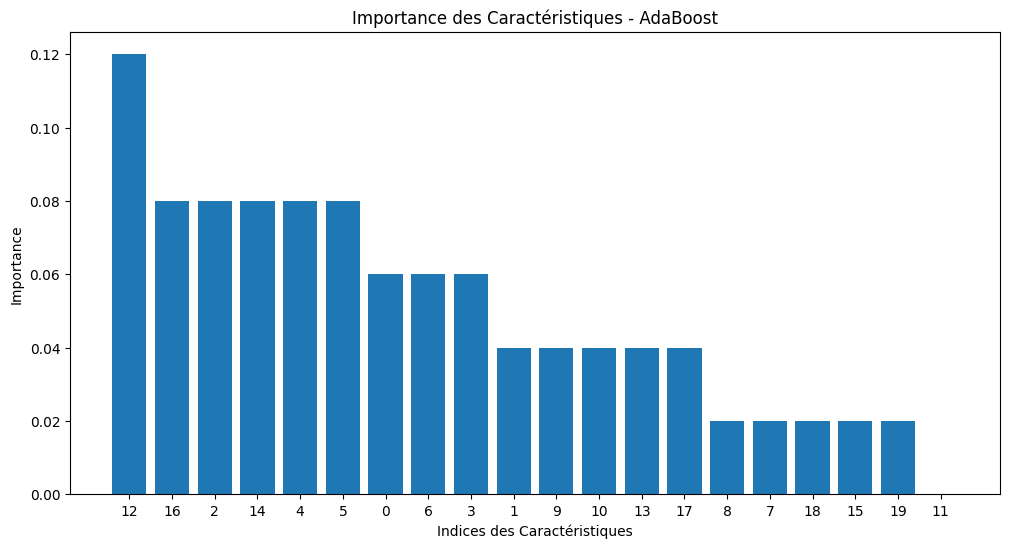

In [ ]:
# Importance des caractéristiques
importances = ada.feature_importances_
indices = np.argsort(importances)[::-1]

# Affichage
plt.figure(figsize=(12,6))
plt.title("Importance des Caractéristiques - AdaBoost")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlabel('Indices des Caractéristiques')
plt.ylabel('Importance')
plt.show()

## 8. K-Means Clustering

### Introduction
Le K-Means Clustering est un algorithme d'apprentissage non supervisé utilisé pour regrouper des données similaires en clusters (groupes). Il partitionne les données en K clusters, où chaque observation appartient au cluster avec la moyenne la plus proche.

### Pourquoi l'utiliser ?
- Exploration des Données : Utile pour découvrir des structures cachées dans les données.
- Simplicité : Facile à comprendre et à implémenter.
- Efficacité : Rapide pour les grands jeux de données.

### Comment ça marche ?
- Initialisation : Choisir K centres de clusters initiaux (centroïdes), soit aléatoirement, soit en utilisant des méthodes heuristiques.
- Assignation : Affecter chaque point de données au centroïde le plus proche.
- Mise à Jour : Calculer la nouvelle position des centroïdes en prenant la moyenne des points assignés à chaque cluster.
- Convergence : Répéter les étapes d'assignation et de mise à jour jusqu'à ce que les centroïdes ne changent plus significativement.

### Limitations
- Choix de K : Le nombre de clusters K doit être spécifié à l'avance.
- Sensibilité aux Valeurs Anormales : Les outliers peuvent affecter les résultats.
- Forme des Clusters : Suppose que les clusters sont sphériques et de taille similaire.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

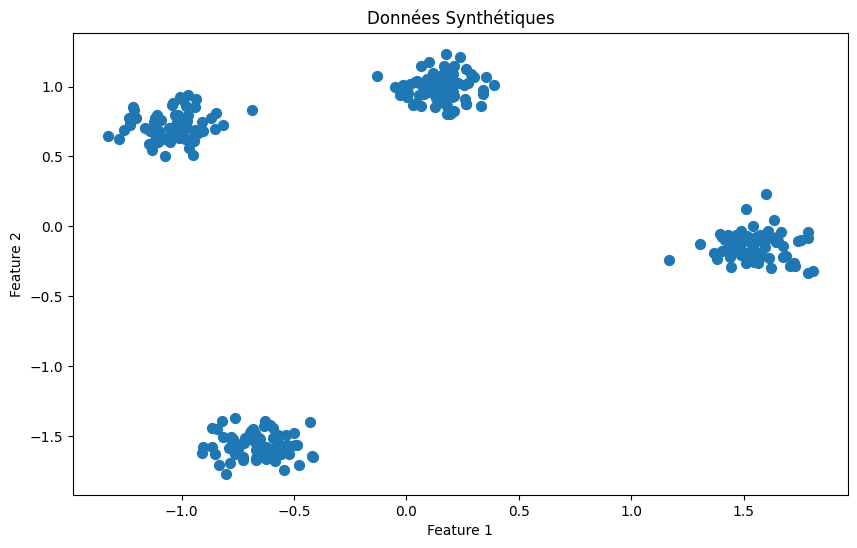

In [ ]:
# Générer des données avec des blobs (groupes)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Afficher les données
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title('Données Synthétiques')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Détermination du Nombre Optimal de Clusters (K)**

Nous pouvons utiliser la méthode du coude pour déterminer le nombre optimal de clusters.

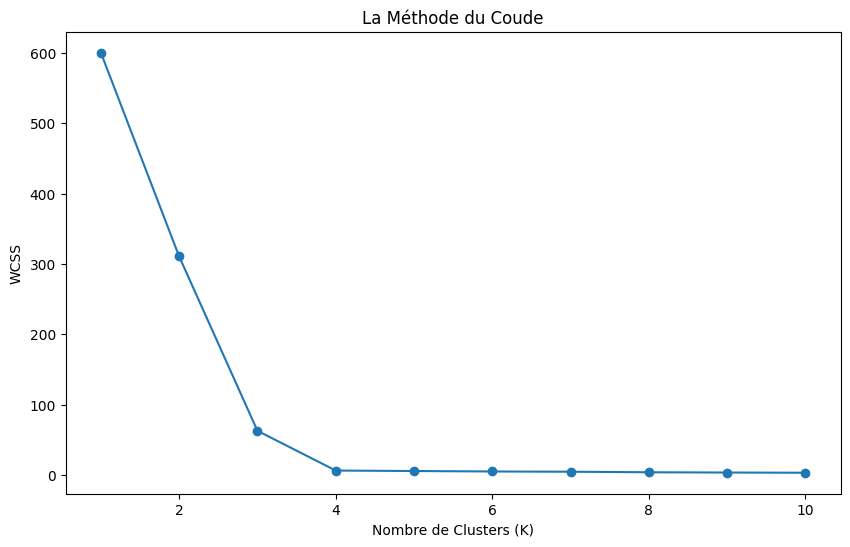

In [ ]:
wcss = []  # Within-Cluster Sum of Square

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisation de la méthode du coude
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('La Méthode du Coude')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('WCSS')
plt.show()

**Interprétation :**

Le "coude" dans le graphique indique le nombre optimal de clusters. Ici, le coude est autour de K=4.

In [ ]:
# Création du modèle avec K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Prédictions des clusters
clusters = kmeans.predict(X_scaled)

# Ajout des clusters au DataFrame
data = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
data['Cluster'] = clusters

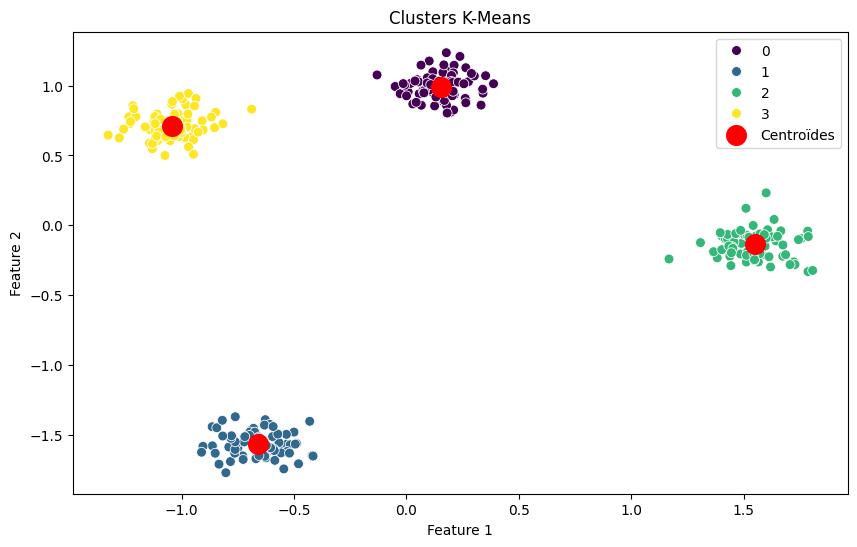

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Feature 1', y='Feature 2', hue='Cluster', palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroïdes')
plt.title('Clusters K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Interprétation
Les points sont colorés selon leur cluster assigné, et les centroïdes sont indiqués en rouge. Nous pouvons observer que l'algorithme a correctement identifié les groupes naturels dans les données.

#### Évaluation du Modèle
Bien que les techniques d'évaluation pour le clustering soient moins directes que pour l'apprentissage supervisé, nous pouvons utiliser des métriques telles que le Coefficient de Silhouette.

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print('Coefficient de Silhouette : {:.2f}'.format(score))

Coefficient de Silhouette : 0.88


### Interprétation :

Le coefficient de silhouette varie entre -1 et 1. Un score proche de 1 indique que les points sont bien assignés à leurs clusters.

### Conclusion
Le K-Means Clustering est une technique efficace pour regrouper des données non étiquetées en clusters significatifs. Il est important de standardiser les données et de choisir judicieusement le nombre de clusters pour obtenir de bons résultats.

## 9. Analyse en Composantes Principales (PCA)

### Introduction
L'Analyse en Composantes Principales (PCA) est une technique d'apprentissage non supervisé utilisée pour la réduction de dimensionnalité. Elle transforme un ensemble de variables éventuellement corrélées en un ensemble de variables non corrélées appelées composantes principales.

### Pourquoi l'utiliser ?
- Réduction de la Dimensionnalité : Diminue le nombre de variables tout en conservant le maximum d'information possible.
- Visualisation : Permet de visualiser des données haute dimension en 2D ou 3D.
- Élimination du Bruit : Réduit le bruit en éliminant les composantes avec une faible variance.
- Prétraitement : Peut améliorer les performances des modèles d'apprentissage supervisé en réduisant le surapprentissage.

### Comment ça marche ?
- Standardisation des Données : Les variables sont mises à l'échelle pour avoir une moyenne de 0 et un écart-type de 1.
- Calcul de la Matrice de Covariance : Mesure comment les variables varient ensemble.
- Calcul des Valeurs Propres et Vecteurs Propres : Les valeurs propres indiquent l'importance de chaque composante, les vecteurs propres définissent la direction.
- Projection : Les données sont projetées sur les composantes principales.

### Illustration avec des Données Synthétiques
Nous allons créer un jeu de données synthétique en 3 dimensions, où les variables sont fortement corrélées. Le but est de montrer comment le PCA peut réduire la dimensionnalité tout en conservant l'essentiel de l'information.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Fixer la seed pour la reproductibilité
np.random.seed(42)

# Génération de 1000 points
n_samples = 1000

# Création de variables fortement corrélées
X1 = np.random.normal(loc=0.0, scale=1.0, size=n_samples)
X2 = X1 * 0.8 + np.random.normal(loc=0.0, scale=0.2, size=n_samples)
X3 = X1 * 0.6 + X2 * 0.3 + np.random.normal(loc=0.0, scale=0.2, size=n_samples)

# Création d'un DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

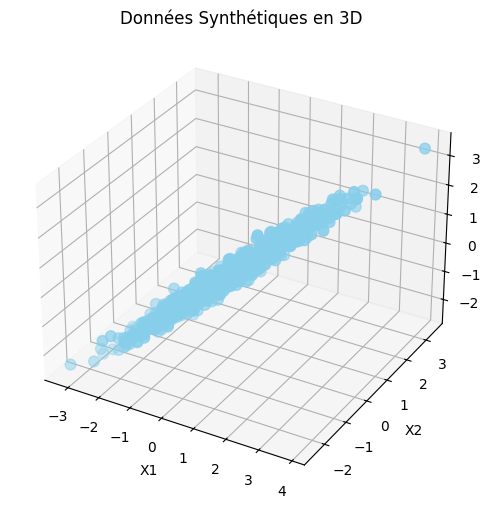

In [ ]:
# Visualisation en 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'], df['X2'], df['X3'], c='skyblue', s=60)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Données Synthétiques en 3D')
plt.show()

Matrice de Corrélation :
          X1        X2        X3
X1  1.000000  0.968504  0.970467
X2  0.968504  1.000000  0.956834
X3  0.970467  0.956834  1.000000


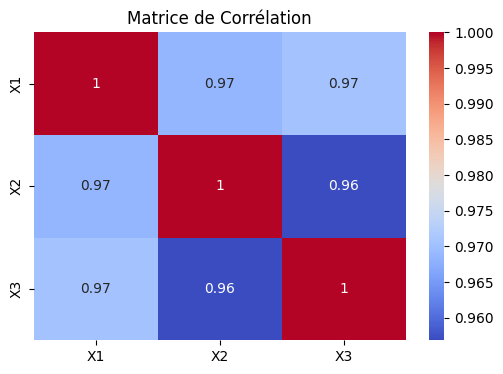

In [ ]:
# Matrice de corrélation
corr_matrix = df.corr()
print("Matrice de Corrélation :")
print(corr_matrix)

# Heatmap de la matrice de corrélation
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

**Interprétation :**

Les variables X1, X2 et X3 sont fortement corrélées entre elles. Cela signifie qu'il y a une redondance d'information, et que nous pouvons réduire la dimensionnalité sans perdre beaucoup d'information.

In [ ]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

**Application du PCA**

Nous allons appliquer le PCA pour réduire la dimensionnalité de 3 à 2 composantes principales.

In [ ]:
# PCA avec 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Création d'un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

In [ ]:
# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

# Variance expliquée cumulative
cumulative_variance = np.cumsum(explained_variance)
print("\nVariance expliquée cumulative :")
for i, var in enumerate(cumulative_variance):
    print(f"PC1 to PC{i+1}: {var:.4f}")

Variance expliquée par chaque composante :
PC1: 0.9768
PC2: 0.0144

Variance expliquée cumulative :
PC1 to PC1: 0.9768
PC1 to PC2: 0.9913


**Interprétation :**

La première composante principale (PC1) explique une grande partie de la variance totale, et les deux premières composantes principales expliquent ensemble presque toute la variance. Cela signifie que nous pouvons représenter nos données en 2 dimensions sans perdre beaucoup d'information.

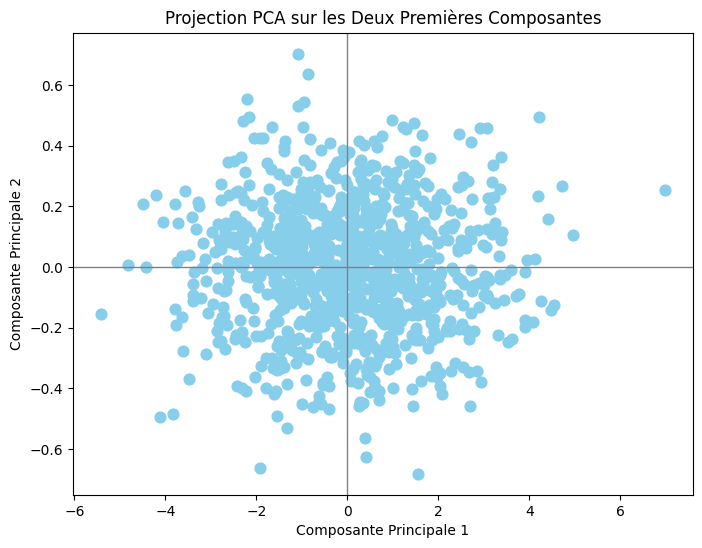

In [ ]:
# Visualisation des données projetées sur les deux premières composantes principales
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='skyblue', s=60)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection PCA sur les Deux Premières Composantes')
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.show()

**Interprétation :**

Nous avons réussi à représenter les données en 2 dimensions tout en conservant l'essentiel de l'information.

**Reconstruction des Données**

Nous pouvons également reconstruire les données originales à partir des composantes principales pour voir combien d'information a été perdue.

In [ ]:
# Reconstruction des données à partir des composantes principales
X_reconstructed = pca.inverse_transform(X_pca)

# Calcul de l'erreur de reconstruction
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)
print(f"Erreur de reconstruction moyenne : {reconstruction_error:.4f}")

Erreur de reconstruction moyenne : 0.0087


**Interprétation :**

L'erreur de reconstruction est très faible, ce qui signifie que la réduction de dimensionnalité n'a pas entraîné une perte significative d'information.

**Visualisation de la Reconstruction**

Comparons les données originales et reconstruites pour une variable.

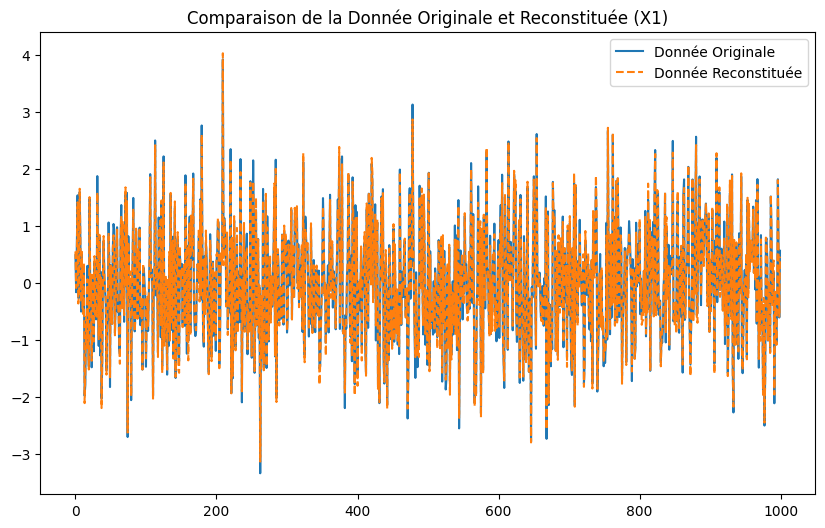

In [ ]:
# Comparaison pour la première variable
plt.figure(figsize=(10,6))
plt.plot(X_scaled[:,0], label='Donnée Originale')
plt.plot(X_reconstructed[:,0], label='Donnée Reconstituée', linestyle='--')
plt.legend()
plt.title('Comparaison de la Donnée Originale et Reconstituée (X1)')
plt.show()

**Interprétation :**

Les courbes des données originales et reconstruites se superposent presque parfaitement, montrant que la réduction de dimensionnalité a préservé l'essentiel de l'information.


**Bénéfices du PCA**

- Réduction de la Dimensionnalité : Nous sommes passés de 3 à 2 dimensions tout en conservant la majeure partie de l'information (variance).
- Visualisation : En réduisant à 2 dimensions, nous pouvons visualiser les données plus facilement.
- Élimination de la Redondance : Le PCA élimine la redondance due à la corrélation entre les variables.
- Prétraitement pour l'Apprentissage Supervisé : En réduisant le nombre de variables, nous pouvons simplifier les modèles d'apprentissage supervisé et réduire le risque de surapprentissage.